# TP: Boolean Model-Checking 

- MAPK signalling CRN from BioModels http://biomodels.org
- CTL-based model-checking
- CTL-based model-reduction

F. Fages, 2019-2022

### Toy example first

In [ ]:
a+b => c.

In [ ]:
present(a). present(b).

In [ ]:
check_ctl(query: EX(a /\ not b /\ c)).

In [ ]:
check_ctl(query: AX(a /\ not b /\ c)).

In [ ]:
check_ctl(query: AX(c)).

In [ ]:
check_ctl(query: AG(c)).

In [ ]:
check_ctl(query: AX(AG(c))).

### The MAPK signalling reaction cascade CRN

CRN structure present in all eukaryote cells and in multiple copies with different molecular species for sensing different signals

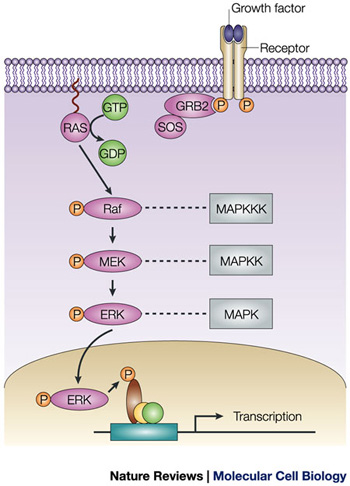



### Schema of model 9 in BioModels after Huang CY, Ferrell JE Jr

Ultrasensitivity in the mitogen-activated protein kinase cascade.

Proc. Natl. Acad. Sci. U.S.A. 1996:93(19):10078-83

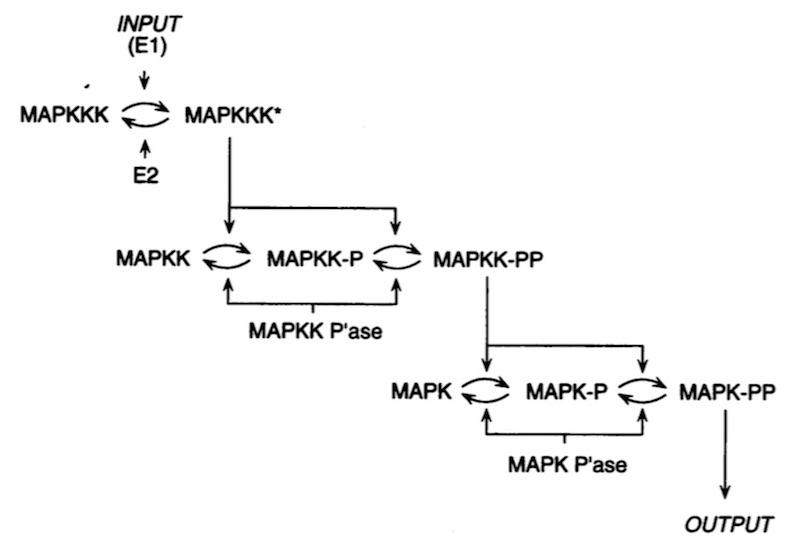

### Systems Biology Markup Language (SBML) model

Imported from the model repository BioModels.net

In [ ]:
load('library:biomodels/BIOMD0000000009.xml').

In [ ]:
list_model.

### Model renamed for convenience with simpler molecule names 

In [ ]:
load(BIOMD9renamed.bc).

In [ ]:
list_model.

In [ ]:
draw_reactions.

In [ ]:
draw_influences.

### Conservation laws
* Linear invariants 
* i.e. set of molecular species with a constant total number of molecules

In [ ]:
search_conservations.

# Differential semantics

### Reachability of a stable state

In [ ]:
option(time:200).
numerical_simulation. 
plot.

### Activation trajectories of the output at each level

In [ ]:
option(show: {KKKp, KKpp, Kpp}). % activated outputs for each level
plot.

## Input/output functions
* stiffer sigmoids on the 2nd and 3rd levels
* showing all-or-nothing switch at the 3rd level (output of the signaling network)
* function of an analog-digital converter

In [ ]:
dose_response(E1, 1e-7, 5e-5, time:1000).

# Boolean semantics 
### Enumeration of stable Boolean states
* terminal strongly connected component analysis of the state transition graph
* enumeration of all stable boolean states in which the system stays indefinitely

In [ ]:
list_stable_states.

## Question 1) Explain what are those stable states
* first the trivial ones
* plus some non-trivial ones

.

.

.

.

.


# CTL model-checking
* verification of Computation Tree Logic (CTL) formulae
* fragment of CTL* restricted to temporal operators immediately precedented by a path quantifier (```EX, AX, EF, AF, EG, AG```, etc.)

### Specification of the set of initial states
* zero/non-zero Boolean abstraction of real-valued concentrations 
* input ```E1``` *present*
* non-phosphorylated forms ```KKK, KK, K``` *present*
* phosphatases ```E2, KKPase, KPase``` *present*
* the other molecules are *undefined* (can be present or absent)
* by default CTL formulae are checked for all completions of the initial state: ```option(boolean_initial_states: all).```

In [ ]:
list_initial_state.

### Trivial CTL queries about the initial states
The initial state may be partially defined by present molecular species given with a concentration.

The queries are relative to
* all present/absent completions of the initial state (default option)
* some completion ("some" option)
* treating undefined species as absent ("present" option)

In [ ]:
check_ctl(query: KKK).

In [ ]:
check_ctl(query: KKKp).

In [ ]:
check_ctl(query: KKKp, boolean_initial_states: some).

In [ ]:
check_ctl(query: KKKp, boolean_initial_states: present).

### Reachability of a given steady state
* a steady state is a set of boolean states in which the cell may stay indefinitevely
* a stable state is a set of boolean states that the cell cannot leave

In [ ]:
expand_ctl(stable(x)).

In [ ]:
expand_ctl(steady(x)).

In [ ]:
expand_ctl(reachable(steady(x))).

In [ ]:
check_ctl(query: reachable(steady(Kpp))).

In [ ]:
check_ctl(query: reachable(steady(not E1))).

In [ ]:
check_ctl(query: reachable(steady(not E1 /\ not E1_KKK))). % conservation law...

## Question 2) Write a query to verify whether 
* one can reach a steady state where E1 is absent 
* from which a steady state with E1_KKK absent can be reached

## Automatic generation of all reachable simple steady states
* By "generate and test" for all molecular species

Here, each molecule can reach a steady state in which it can stay present indefinitely
* this is due to the asynchronous Boolean semantics which does not need to be fair 
* that semantics allows transitions that let the molecule always present

In [ ]:
generate_ctl(reachable(steady(x))).

### Explanations by Boolean traces
Some explanations are provided by the CTL symbolic model-checker used, NuSMV, provided the formula is
* either provably true by a *single computation path* from *some* initial state
* or falsified by *one counter-example initial state*

In the other cases (e.g. reachability from all initial states which is the default), the proof is a complex symbolic transition graph which is not printed.

The traces given as explanation may be not minimal.

In [ ]:
option(boolean_trace: yes).

In [ ]:
check_ctl(query: reachable(steady(Kpp))).

In [ ]:
check_ctl(query: reachable(steady(Kpp)), boolean_initial_states: some).

### Reachability of stable states

In [ ]:
expand_ctl(reachable(stable(x))).

In [ ]:
generate_ctl(reachable(stable(x))).

In [ ]:
generate_ctl(reachable(stable(x)), boolean_initial_states: some).

## Question 3) Explain why there is no species stable state reachable for either all or some of the initial states
Hint: look at the drawing of the network

.

.

.

.

.



### Checkpoints
"Cum hoc sed non propter": factual precedence properties are not necessarily causal

In [ ]:
expand_ctl(checkpoint(A, B)).

In [ ]:
check_ctl(query:checkpoint(KKpp,Kpp)). 

In [ ]:
check_ctl(query:checkpoint(KKpp,Kpp), boolean_initial_states: some).

In [ ]:
expand_ctl(checkpoint2(A, B)).

In [ ]:
check_ctl(query:checkpoint2(KKpp,Kpp)).

In [ ]:
check_ctl(query:checkpoint2(KKpp,Kpp), boolean_initial_states: some).

In [ ]:
check_ctl(query:checkpoint2(KKpp,Kpp), boolean_initial_states: present).

### Oscillations in CTL (necessary condition)
Oscillations cannot be expressed in CTL but can be approximated by the necessary (not sufficient) condition
* the formula ```EG(EF(x)/\EF(not x))```

In Biocham, to partially palliate the absence of sufficient condition, we had the existence of at least 3 peaks

In [ ]:
expand_ctl(oscil(x)).

In [ ]:
generate_ctl(oscil(x)).

In [ ]:
check_ctl(query:oscil(E1)).

In [ ]:
check_ctl(query:not(oscil(E1)), boolean_trace:yes).

In [ ]:
check_ctl(query:not(oscil(E1)), boolean_initial_states:some).

### Oscillations in LTL 
* LTL = CTL* without path quantifiers
* exact formulation of oscillations
* false on all paths here
* true for some paths and initial state

In [ ]:
option(boolean_trace: no).
check_ltl(G(F(Kpp) /\ F(not Kpp))).

In [ ]:
check_ltl(G(F(Kpp) /\ F(not Kpp)), boolean_initial_states: some).

# Automatic enumeration of simple CTL properties
By default, enumeration of
* reachability of stable or steady states
* checkpoints
* ocsillations


In [ ]:
option(boolean_trace: no).
generate_ctl.

# Experiment Design
## Question 4) Specify a set of initial states such that
* the input ```E1```
* the non-phosphorylated forms ```KKK, KK, K```
* the phosphatases ```E2, KKPase, KPase```

are *undefined* using Biocham command ```undefined({...})```

and the other molecules are *absent* (using Biocham command ```make_absent_not_present```) 
## and determine by CTL model-checking an initial state such that
* the output Kpp is reachable and *stable*

## Question 5) Generate CTL properties from this initial state
* using ```generate_ctl```
## and comment the result
* explain the main differences with the CTL properties obtained with the previous initial state

.

.

.

.

# Model reduction preserving CTL properties
* The CTL properties generated above (by ```generate_ctl```) constitute a specification of the Boolean behavior of the system
* The CTL model-checker can be used to check whether deleting one reaction affects or not the current CTL specification
* The reduced model will usually depend on the ordering in which the reactions are tested

In [ ]:
load(BIOMD9renamed.bc).

In [ ]:
list_initial_state.

### Precise initial state without undetermined species

In [ ]:
make_absent_not_present.
list_initial_state.

### Generation of all true CTL properties of some simple form
* reachability of stable or steady states
* checkpoints
* ocsillations

In [ ]:
generate_ctl.

In [ ]:
list_ctl. % CTL specification generated by generate_ctl

In [ ]:
reduce_model. % model reduction preserving CTL specification

## Question 6) Explain the result of the model reduction
* Which reactions have been removed ? 
* Why ?

.

.


## Question 7) Are there reachable stable states? 
Explain why

. 

. 


## Question 8) Give discriminating CTL Properties
* Give CTL properties that have different truth values in the original model and in the reduced model

## Question 9) Differential semantics of the reduced model

* Perform numerical simulation
* Explain the main differences with the complete model
